In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv(r'C:/Users/uzmap/Documents/GitHub/ForEx/all_data.csv')
df.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR


In [34]:
usd_inr = df.loc[df['Currency Pair']=='USD/INR']
usd_inr 

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.4000,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.4950,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.5080,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.3910,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.5650,USD/INR
...,...,...,...,...,...,...
2598,2024-10-24,84.045,84.080,84.017,84.0640,USD/INR
2599,2024-10-25,84.067,84.080,84.021,84.0750,USD/INR
2600,2024-10-28,84.062,84.080,84.016,84.0400,USD/INR
2601,2024-10-29,84.045,84.080,83.996,84.0380,USD/INR


### Calculate BollingerBands
#### Bollinger Bands are a technical analysis tool used to measure market volatility and identify overbought or oversold conditions. They consist of three lines:

#### The Middle Band: This is a moving average, typically a 20-period simple moving average (SMA).
#### The Upper Band: This is the SMA plus a multiple of the standard deviation of the price (typically 2 times the standard deviation).
#### The Lower Band: This is the SMA minus the same multiple of the standard deviation.

C:\Users\uzmap\AppData\Local\Temp\ipykernel_23312\808905609.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_inr['Date'] = pd.to_datetime(usd_inr['Date'])
C:\Users\uzmap\AppData\Local\Temp\ipykernel_23312\808905609.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bands.fillna(method='ffill', inplace=True)  # Forward-fill
C:\Users\uzmap\AppData\Local\Temp\ipykernel_23312\808905609.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bands.fillna(method='bfill', inplace=True)  # Backward-fill


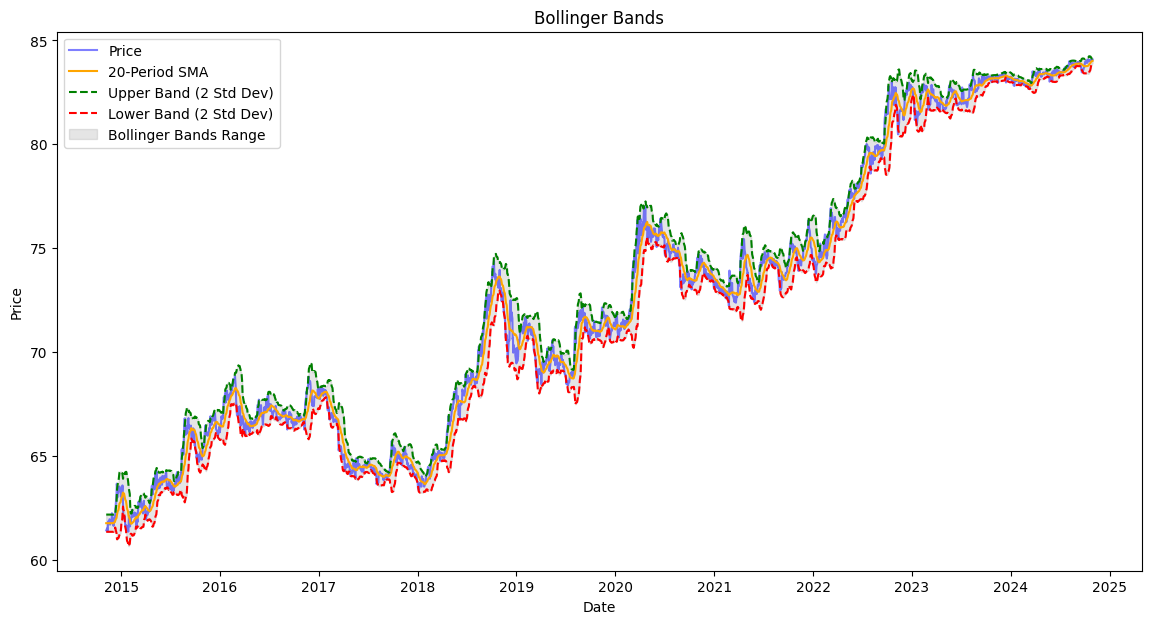

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, period=20, num_std_dev=2):
    ##Period 20 is ideal for swing traders
    sma = data.rolling(window=period).mean()
    std_dev = data.rolling(window=period).std()
    upper_band = sma + (std_dev * num_std_dev)
    lower_band = sma - (std_dev * num_std_dev)
    
    bands =  pd.DataFrame({
        'Price': data,
        'SMA': sma,
        'Upper Band': upper_band,
        'Lower Band': lower_band
    })

    bands.fillna(method='ffill', inplace=True)  # Forward-fill
    bands.fillna(method='bfill', inplace=True)  # Backward-fill

    return bands

usd_inr['Date'] = pd.to_datetime(usd_inr['Date'])
usd_inr.set_index('Date', inplace=True)

# Calculate Bollinger Bands
bollinger_data = calculate_bollinger_bands(usd_inr['Closing_price'])

usd_inr = usd_inr.join(bollinger_data)
usd_inr.drop('Price',axis=1, inplace=True)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(bollinger_data.index, bollinger_data['Price'], label='Price', color='blue', alpha=0.5)
plt.plot(bollinger_data.index, bollinger_data['SMA'], label='20-Period SMA', color='orange')
plt.plot(bollinger_data.index, bollinger_data['Upper Band'], label='Upper Band (2 Std Dev)', color='green', linestyle='--')
plt.plot(bollinger_data.index, bollinger_data['Lower Band'], label='Lower Band (2 Std Dev)', color='red', linestyle='--')
plt.fill_between(bollinger_data.index, 
                 bollinger_data['Upper Band'], 
                 bollinger_data['Lower Band'], 
                 color='gray', alpha=0.2, label='Bollinger Bands Range')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [36]:
usd_inr

,Open_price,Day_high,Day_low,Closing_price,Currency Pair,SMA,Upper Band,Lower Band
Date,,,,,,,,
2014-11-07,61.390,61.620,61.340,61.4000,USD/INR,61.749600,62.164424,61.334776
2014-11-10,61.500,61.635,61.340,61.4950,USD/INR,61.749600,62.164424,61.334776
2014-11-11,61.530,61.555,61.505,61.5080,USD/INR,61.749600,62.164424,61.334776
2014-11-12,61.508,61.560,61.350,61.3910,USD/INR,61.749600,62.164424,61.334776
2014-11-13,61.368,61.623,61.350,61.5650,USD/INR,61.749600,62.164424,61.334776
...,...,...,...,...,...,...,...,...
2024-10-24,84.045,84.080,84.017,84.0640,USD/INR,83.964200,84.182951,83.745449
2024-10-25,84.067,84.080,84.021,84.0750,USD/INR,83.985150,84.154240,83.816060
2024-10-28,84.062,84.080,84.016,84.0400,USD/INR,84.000400,84.123167,83.877633


            Open_price  Day_high  Day_low  Closing_price Currency Pair  \
Date                                                                     
2014-11-07      61.390    61.620   61.340         61.400       USD/INR   
2014-11-10      61.500    61.635   61.340         61.495       USD/INR   
2014-11-11      61.530    61.555   61.505         61.508       USD/INR   
2014-11-12      61.508    61.560   61.350         61.391       USD/INR   
2014-11-13      61.368    61.623   61.350         61.565       USD/INR   

                SMA  Upper Band  Lower Band    100 EMA    200 EMA     50 EMA  
Date                                                                          
2014-11-07  61.7496   62.164424   61.334776  61.400000  61.400000  61.400000  
2014-11-10  61.7496   62.164424   61.334776  61.401881  61.400945  61.403725  
2014-11-11  61.7496   62.164424   61.334776  61.403983  61.402010  61.407815  
2014-11-12  61.7496   62.164424   61.334776  61.403725  61.401901  61.407155  
2014-11

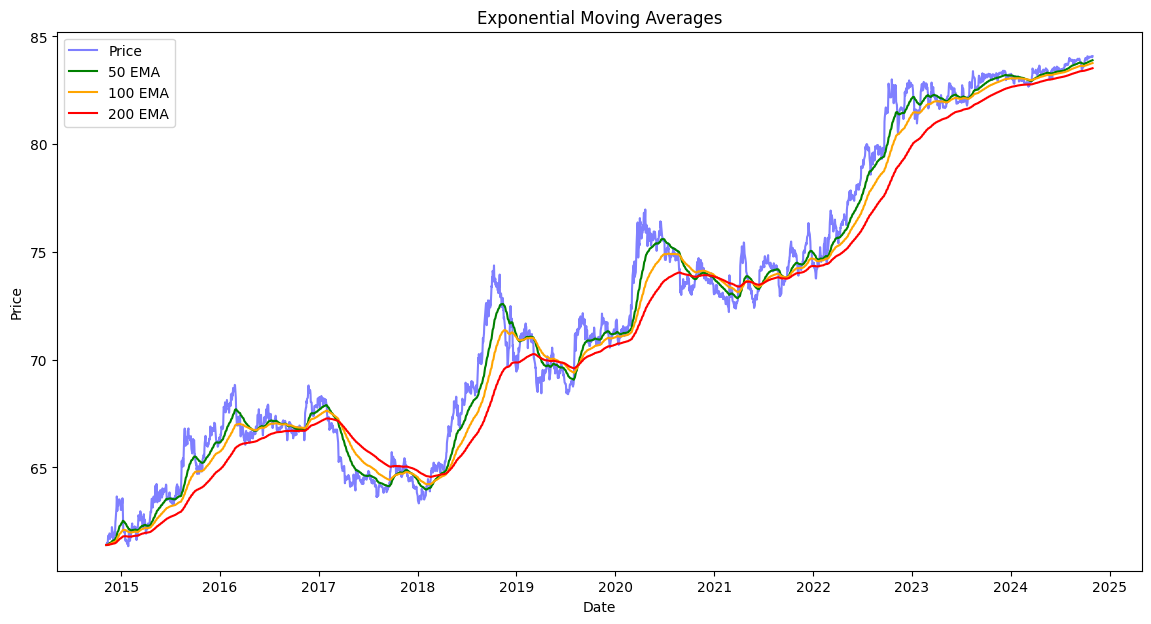

In [38]:
def calculate_ema(data, period=100):
    return data.ewm(span=period, adjust=False).mean()

# Calculate 100 EMA
usd_inr['100 EMA'] = calculate_ema(usd_inr['Closing_price'], period=100)
usd_inr['200 EMA'] = calculate_ema(usd_inr['Closing_price'], period=200)
usd_inr['50 EMA'] = calculate_ema(usd_inr['Closing_price'], period=50)

# Print a preview of the data
print(usd_inr.head())

plt.figure(figsize=(14, 7))
plt.plot(usd_inr.index, usd_inr['Closing_price'], label='Price', color='blue', alpha=0.5)
plt.plot(usd_inr.index, usd_inr['50 EMA'], label='50 EMA', color='green')
plt.plot(usd_inr.index, usd_inr['100 EMA'], label='100 EMA', color='orange')
plt.plot(usd_inr.index, usd_inr['200 EMA'], label='200 EMA', color='red')
plt.title('Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
